In [17]:
#Importing libraries and classes
from sklearn.preprocessing import LabelBinarizer as LB
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score


#Reading the file
path = 'gender_classification_v7.csv'
data= pd.read_csv(path)
data.head(5)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [18]:
#Dropping uneeded data
data.drop(['nose_wide','nose_long','distance_nose_to_lip_long'],axis=1,inplace=True)
data.head(5)

,long_hair,forehead_width_cm,forehead_height_cm,lips_thin,gender
0,1,11.8,6.1,1,Male
1,0,14.0,5.4,1,Female
2,0,11.8,6.3,1,Male
3,0,14.4,6.1,1,Male
4,1,13.5,5.9,0,Female


In [19]:
    #Encoding data that have different labels (Not only (yes,no))
    le = LE()  # Label Encoding
    for col in ['gender']:
        data[col] = le.fit_transform(data[col])

In [20]:
data.head(5)

,long_hair,forehead_width_cm,forehead_height_cm,lips_thin,gender
0,1,11.8,6.1,1,1
1,0,14.0,5.4,1,0
2,0,11.8,6.3,1,1
3,0,14.4,6.1,1,1
4,1,13.5,5.9,0,0


In [21]:
col = data.columns

In [22]:
#Scalling the data
msc = MinMaxScaler()
data_scaled = msc.fit_transform(data)
data = pd.DataFrame(data_scaled,  columns=col)


In [23]:
data.head(5)

,long_hair,forehead_width_cm,forehead_height_cm,lips_thin,gender
0,1.0,0.097561,0.50,1.0,1.0
1,0.0,0.634146,0.15,1.0,0.0
2,0.0,0.097561,0.60,1.0,1.0
3,0.0,0.731707,0.50,1.0,1.0
4,1.0,0.512195,0.40,0.0,0.0


In [24]:
#Spliting data into feateure and the data should be predicted
feature_cols = [x for x in data.columns if x != 'gender']
x_data = data[feature_cols]
y_data = data['gender']

#Spliting data into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.40, random_state=19)

In [25]:
error_train= list()
error_test = list()
for k in range(1,11):
    #training the model
    knn = KNeighborsClassifier(n_neighbors=k,p=2)
    knn = knn.fit(X_train,y_train)

    #calculating the error during the training
    y_pred_train = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train,y_pred_train)
    error_train.append((k,train_accuracy))

    #calculating the error during the test
    y_pred_test = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test,y_pred_test)
    error_test.append((k,test_accuracy))


#Converting the data to dataframes to plot them
train_df = pd.DataFrame(error_train, columns=['k', 'accuracy'])
test_df = pd.DataFrame(error_test, columns=['k', 'accuracy'])

In [26]:
test_df

,k,accuracy
0,1,0.836582
1,2,0.841579
2,3,0.881059
3,4,0.871064
4,5,0.903048
5,6,0.893053
6,7,0.907046
7,8,0.902549
8,9,0.903048
9,10,0.901549


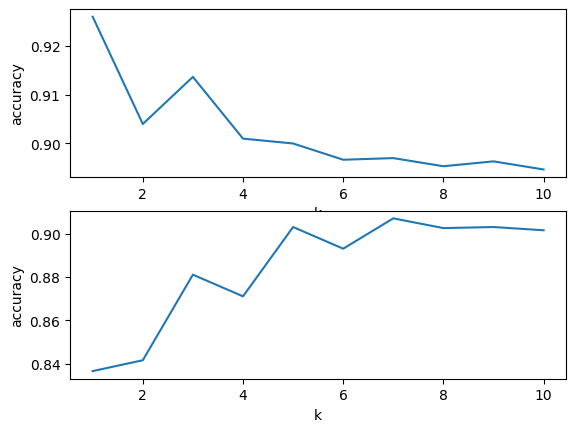

In [27]:
#making two plots one for train and for test
fig, (ax1,ax2) = plt.subplots(2,1)

#Ploting train
ax1.plot(train_df['k'],train_df['accuracy'])
ax1.set_xlabel('k')
ax1.set_ylabel('accuracy')

#ploting test
ax2.plot(test_df['k'],test_df['accuracy'])
ax2.set_xlabel('k')
ax2.set_ylabel('accuracy')

plt.show()

In [28]:
# Fit the model on the training set
knn = KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(X_train, y_train)

# Predictions on the test set
y_pred = knn.predict(X_test)

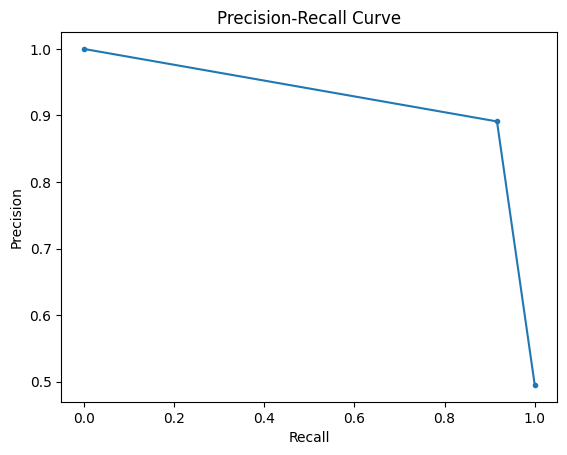

In [29]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [30]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Display the confusion matrix and accuracy
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)

Confusion Matrix:
[[899 111]
 [ 83 908]]

Accuracy: 0.9030484757621189


In [31]:
# Create a heatmap for the confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Actual vs. Predicted')
plt.show()

ModuleNotFoundError: No module named 'seaborn'